Each task that is proposed to be completed as part of the homework has a declared "price" in points. The maximum possible amount is 10 points, and together with the bonus assignment - 12 points. It is not necessary to complete all the tasks, only a part can be done. Most of the points expect you to write working Python code; sometimes you will need to write comments - for example, to compare several approaches to solve the same problem. Also you can add more cells for your convenience if you need.


Каждое задание, которое предлагается выполнить в составе домашнего задания, имеет заявленную «цену» в баллах. Максимально возможная сумма — 10 баллов, а вместе с бонусным заданием — 12 баллов. Не обязательно выполнять все задания, можно сделать только часть. Большинство пунктов предполагают, что вы напишете работающий код Python; иногда нужно будет написать комментарии — например, чтобы сравнить несколько подходов к решению одной и той же задачи. Также вы можете добавить больше ячеек для вашего удобства, если вам нужно.

This homework focuses on clustering. We will work with images of handwritten digits, learn how to cluster them using two different methods (hierarchical clustering and the 𝐾-means algorithm), evaluate the quality of the partition and choose the optimal number of clusters, as well as visualize intermediate results.

Это домашнее задание посвящено кластеризации. Мы будем работать с изображениями рукописных цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм 𝐾-средних), оценим качество разбиения и выберем оптимальное количество кластеров, а также визуализируем промежуточные результаты.

## 1. Loading data
The data we will be working with is available in the scikit-learn library (`sklearn` module) in the `datasets` submodule via the `load_digits` function. The data contains 1,797 observations, each of which is 8×8 pixel image of a handwritten digit from 0 to 9. This is about the same amount of each digit (about 180).

For convenience, every image expands to a 64 (8×8) row, so entire numpy array is 1797×64. The color intensity in each pixel is encoded with an integer from 0 to 16.

In addition to images, their labels are also known. In this task, we will assume that the labels (as well as their amount) are unknown and try to group the data in such a way that the resulting clusters 'better match' the original ones. Possible options for determining the 'better match' are presented later.

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль sklearn) в подмодуле datasets через функцию load_digits. Данные содержат 1797 наблюдений, каждое из которых представляет собой 8×8-пиксельное изображение рукописной цифры от 0 до 9. Это примерно одинаковое количество каждой цифры (около 180).

Для удобства каждое изображение расширяется до 64 (8 × 8) строк, поэтому весь массив numpy имеет размер 1797 × 64. Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме изображений известны и их метки. В этой задаче будем считать, что метки (как и их количество) неизвестны, и попробуем сгруппировать данные таким образом, чтобы полученные кластеры «лучше совпадали» с исходными. Возможные варианты определения «лучшего совпадения» представлены ниже.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**(0.25 points)** Load the images into `X` variable, and their labels into `y` variable.

In [2]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
print(X.shape, y.shape)

(1797, 64) (1797,)


In [3]:
assert X.shape == (1797, 64)
assert y.shape == (1797,)

**(0.5 points)** Visualize the first 10 images.

- Arrange images on a grid rather than in a row. You may need the `subplot` and `imshow` functions from the `pyplot` module in the `matplotlib` library.
- You will also need to reshape the images to 8×8.
- Remove ticks and labels from both axes. The `xticks` and `yticks` functions or the `tick_params` function from `pyplot` can help you with this.
- Make the output good sized with the `figure` function from `pyplot`.

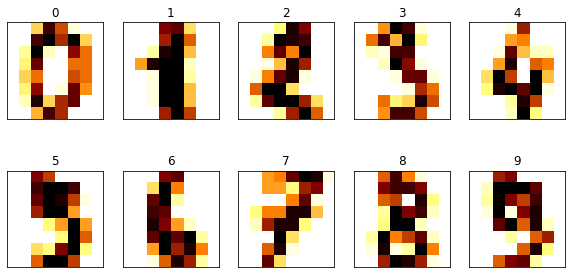

In [4]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.imshow(image.reshape((8, 8)), cmap= plt.cm.afmhot_r)
    ax.set_title(label)
    ax.tick_params(axis='both', which='both', 
                    bottom=False, top=False, 
                    labelbottom=False, 
                    right=False, left=False, labelleft=False)

## 2. Clustering and quality evaluation

**(2 points)** Implement the the KMeans algorithm. Use objective function $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, where $Z_{A(x_{i})}$ is the center of the cluster corresponding to $x_{i}$ object.


Реализовать алгоритм KMeans. Используйте целевую функцию $L = \sum_{i=1}^{n}|x_{i}-Z_{A(x_{i})}|^{2}$, где $Z_{A(x_{i})}$ — центр кластера, соответствующего 𝑥𝑖 объекту.

In [5]:
from sklearn.exceptions import NotFittedError
from numpy.random import RandomState
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering, KMeans

In [2]:
class CustomKMeans:
    def __init__(self, n_clusters=2, max_iter=30, n_init=10, random_state=42):
        '''K-Means clustering.
        
        Args:
            n_clusters: int, default=2
                The number of clusters to be formed is also 
                the number of centroids to generate. 
            max_iter: int, default=300
                Maximum number of iterations of the k-means algorithm for a
                single run.
            n_init: int, default=10
                Number of time the k-means algorithm will be run with different
                centroid seeds. The final results will be the best output of
                n_init consecutive runs in terms of objective function.
            random_state: int, default=42
                Random state.
        '''
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.random_state = RandomState(seed=random_state)
        
    def calculate_distances_to_centroids(self, X, cluster_centers):
        """
        Returns (n, c) matrix where the element at position (i, j) 
        is the distance from i-th object to j-th centroid."""
        # <your code>
        pass
    
    def update_centroids(self, X, nearest_clusters):
        """
        Returns numpy array of shape (n_clusters, n_features) - 
        new clusters that are found by averaging objects belonging 
        to the corresponding cluster."""
        # <your code>
        pass
        
    def fit(self, X):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        """
        assert X.shape[0] >= self.n_clusters
        # <your code>
        
        return self
            
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted cluster labels.
        """
        if hasattr(self, 'cluster_centers_'):
            # <your code>
            pass
        else: 
            raise NotFittedError("CustomKMeans instance is not fitted yet")

**(1 points)** Get the `X` array partition into 10 clusters. Visualize the centers of clusters.
- We will assume that the center of the cluster is average value of all observations belonging to the cluster.
- The cluster centers should have the same shape as our observations (64). So you have to average the points across the rows.

In [ ]:
custom_kmeans_labels = ...
assert custor_kmeans_labels.shape == (1797,)

****
**(0.5 points)** Experiment with `max_iter` and `n_init` parameters. Look at the range of values of the objective function, it's best values, at what parameters and how often they are achieved.

Поэкспериментируйте с параметрами max_iter и n_init. Посмотрите диапазон значений целевой функции, ее оптимальные значения, при каких параметрах и как часто они достигаются.

Целевая функция - inertia_: 

    Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

Сначала будем менять n_init (значение по умолчанию - 10):

    Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [6]:
%%time
funct = []
for j in range(4):
    inert_ninit = []
    for i in range(1, 100):
        kmeans = KMeans(n_clusters=10, n_init=i).fit(X)
        kmeans_inertia = kmeans.inertia_
        inert_ninit.append(kmeans_inertia)
    funct.append(inert_ninit)

CPU times: user 31min 32s, sys: 1min 41s, total: 33min 13s
Wall time: 12min 14s


Text(0, 0.5, 'objective function $inertia$')

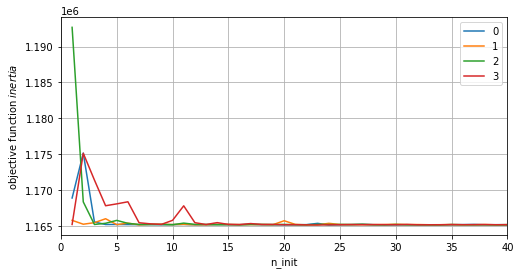

In [7]:
plt.subplots(1, 1, figsize=(8, 4))
plt.grid()
for j in range(4):
    plt.plot(range(1, 100), funct[j], label=str(j))
plt.legend()
plt.xlim(0, 40)
plt.xlabel("n_init")
plt.ylabel("objective function $inertia$")

При различных запусках вид кривой немного меняется. Значения n_iter=10 по умолчанию вполне достаточно для получения оптимального значения целевой функции.

In [8]:
%%time
inert_maxiter = []
for j in range(4):
    funct = []
    maxiter = []
    for i in range(10, 1000, 20):
        kmeans = KMeans(n_clusters=10, max_iter=i).fit(X)
        kmeans_inertia = kmeans.inertia_
        funct.append(kmeans_inertia)
        maxiter.append(i)
    inert_maxiter.append(funct)    

CPU times: user 3min 12s, sys: 10 s, total: 3min 22s
Wall time: 1min 6s


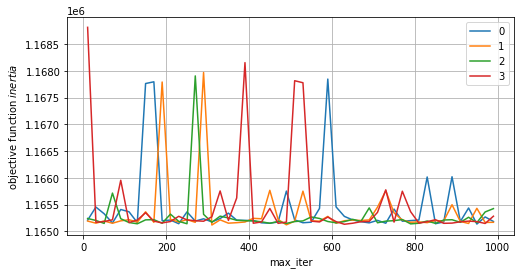

In [9]:
plt.subplots(1, 1, figsize=(8, 4))
for j in range(4):
    plt.plot(maxiter, inert_maxiter[j], label=str(j))
plt.legend()
plt.xlabel("max_iter")
plt.ylabel("objective function $inertia$")
plt.grid()

In [10]:
for j in range(4):
    print(j, (max(inert_maxiter[j]) - min(inert_maxiter[j])) 
           /  max(inert_maxiter[j]))

0 0.002321496688834121
1 0.0024414485575871892
2 0.0023690981589286346
3 0.003150629946082296


    При разных запусках получаются разные виды зависимости целевой функции от параметра max_iter. Но в целом, разница между максимальным и мимнимальным значениями целевой функции составляет менее половины процента -- 0.2-0.4%. Значение по умолчанию max_iter = 300 вполне достаточно для получения оптимального значения целевой функции.

*****
Now we will use two popular algorithms: hierarchical clustering and $K$-means clustering. These and other algorithms are available in the `scikit-learn` module in the `cluster` submodule. Hierarchical clustering is called `AgglomerativeClustering`, and the $K$-means method is called `KMeans`.

**(0.5 points)** Use each of the two methods: hierarchical clustering and KMeans. Get the `X` array partition into 10 clusters.

- Note that `AgglomerativeClustering` does not have a `predict` method, so you can either use the `fit_predict` method or use the `fit` method and then look at the `labels_` attribute of the class instance.
- Kmeans performs multiple runs (default 10) with random centers and then returns the best partition in terms of average distance within the clusters. You can increase the number of runs to improve the quality of predictions in the `i_init` parameter.

In [11]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.manifold import TSNE

In [12]:
hierarchical = AgglomerativeClustering(n_clusters=10).fit(X)
hierarchical_labels = hierarchical.labels_

kmeans = KMeans(n_clusters=10, n_init=20).fit(X)
kmeans_labels = kmeans.predict(X)

In [13]:
assert hierarchical_labels.shape == (1797,)
assert kmeans_labels.shape == (1797,)

**(0.5 points)** Visualize the centers of clusters obtained by both methods.

In [14]:
hierarchical_labels
#clf = NearestCentroid()
#clf.fit(X, hierarchical_labels)

array([7, 9, 4, ..., 4, 1, 4])

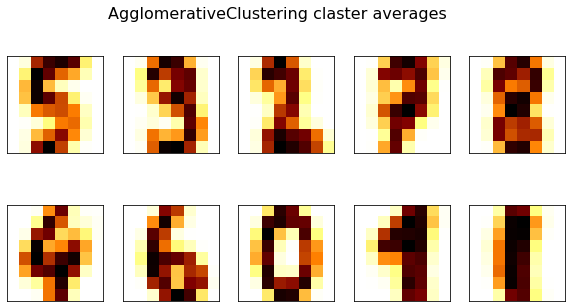

In [18]:
## calculate and plot averages of every claster 
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
i = 0
for ax, image, label in zip(axes.flatten(), X, y):
    image = np.mean(X[hierarchical.labels_== i], axis=0)
    ax.imshow(image.reshape((8, 8)), cmap= plt.cm.afmhot_r)
    ax.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                labelbottom=False, 
                right=False, left=False, labelleft=False)
    i += 1
fig.suptitle("AgglomerativeClustering claster averages", fontsize=16);

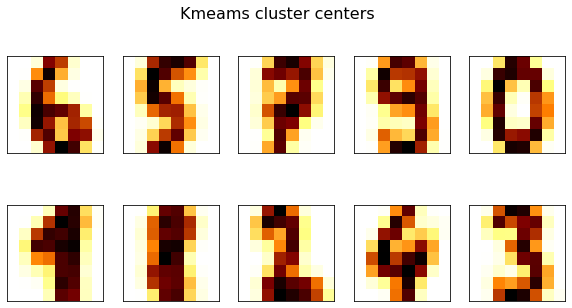

In [20]:
## centers of clusters
kmeans_centers = kmeans.cluster_centers_

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
i = 0
for ax, image in zip(axes.flatten(), X):
    #ax.set_axis_off()
    image = kmeans_centers[i]
    ax.imshow(image.reshape((8, 8)), cmap= plt.cm.afmhot_r)
    ax.tick_params(axis='both', which='both', 
                    bottom=False, top=False, 
                    labelbottom=False, 
                    right=False, left=False, labelleft=False)
    i += 1
fig.suptitle("Kmeams cluster centers", fontsize=16);

*****
In a situation where the true number of classes is unknown, we can select it by maximazing some metric.

When we can set some distance function between our observations, we can consider the `silhouette` distance as a function of measuring the quality of the clustering. Let's show how it is calculated:

Let $X$ – set of observations, $M \subset X$ – one of the clusters obtained as a result of clustering process, $\rho$ – some metric on $X$. Let's choose one observation $x \in M$. Denote $a(x)$ as the average distance from $x$ to  $x'$ points from the same cluster:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Denote $b(x)$ as minimun of average distances from $x$ to $x''$ from some other cluster $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

The silhouette is difference between a(x) and b(x), normalized to $[-1, \, 1]$ and averaged over all observations:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

The implementation of this metric in the `scikit-learn` is the `silhouette_score` function from the `metrics` submidule.

*****
**(0.75 point)** For each $K$ between 2 and 20 inclusive, partition of the array $X$ into $K$ clusters using both methods. Calculate the silhouette score and visualize it for both methods on the same plot ($K$ on the $x$ axis and silhouette score on the $y$ axis). Sign the axes and make a legend.

Для каждого $K$ от 2 до 20 включительно разделите массив $X$ на кластеры $K$, используя оба метода. Рассчитайте оценку силуэта и визуализируйте ее для обоих методов на одном графике ($K$ на оси $x$ и оценка силуэта на оси $y$). Подпишите оси и сделайте легенду.

In [21]:
%%time
silhouette_kmean = []
silhouette_hierr = []
for K in range(2, 21):
    # hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=K).fit(X)
    hierarchical_labels = hierarchical.labels_
    silhouette_hierr.append(silhouette_score(X, hierarchical_labels, metric='euclidean'))
    
    # Kmeans
    kmeans = KMeans(n_clusters=K, n_init=20).fit(X)
    kmeans_labels = kmeans.predict(X)
    silhouette_kmean.append(silhouette_score(X, kmeans_labels, metric='euclidean'))

CPU times: user 45.2 s, sys: 2.06 s, total: 47.3 s
Wall time: 14.1 s


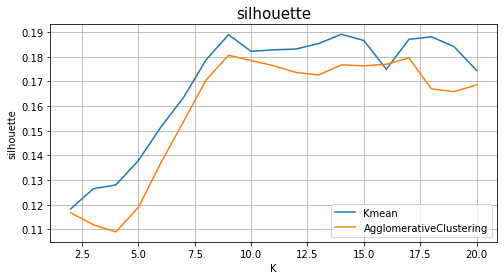

In [23]:
plt.subplots(1, 1, figsize=(8, 4))
plt.grid()
xx = range(2, 21)
plt.plot(xx, silhouette_kmean, label="Kmean")
plt.plot(xx, silhouette_hierr, label="AgglomerativeClustering")
plt.legend()
plt.xlabel("K")
plt.ylabel("silhouette")
plt.title("silhouette", fontsize=15);

****
When we know the true clustering labels, the clustering result can be compared to them using measures such as `homogeneity`, `completeness` and their harmonic mean - $V$-score. The definitions of these quantities are rather bulky and are based on the [entropy of the probability distribution](https://ru.wikipedia.org/wiki/Информационная_энтропия). Details are given in [this article](http://aclweb.org/anthology/D/D07/D07-1043.pdf). In practice, it's enough to know that `homogeneity`, `completeness` and $V$-score are in the range from 0 and 1, and the more, the better.

Since we know what digit each image is (`y` array), we can compare the clustering results to it using the measures listed above.

****
**(0.5 points)** Repeat the previous task using $V$-measure instead of silhouette.

In [24]:
%%time
vscore_kmean = []
vscore_hierr = []
for K in range(2, 21):
    # hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=K).fit(X)
    hierarchical_labels = hierarchical.labels_
    vscore_hierr.append(v_measure_score(y, hierarchical_labels))
    
    # Kmeans
    kmeans = KMeans(n_clusters=K, n_init=20).fit(X)
    kmeans_labels = kmeans.predict(X)
    vscore_kmean.append(v_measure_score(y, kmeans_labels))

CPU times: user 42.8 s, sys: 1.97 s, total: 44.8 s
Wall time: 12.5 s


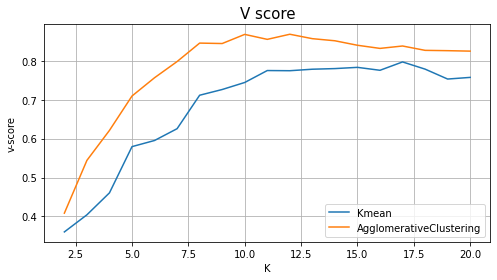

In [25]:
plt.subplots(1, 1, figsize=(8, 4))
plt.grid()
xx = range(2, 21)
plt.plot(xx, vscore_kmean, label="Kmean")
plt.plot(xx, vscore_hierr, label="AgglomerativeClustering")
plt.legend()
plt.xlabel("K")
plt.ylabel("v-score")
plt.title("V score", fontsize=15);

****
## 3. Feature space dimensionality reduction

In some cases, especially when there are a large number of features, when not all of them are informative, and some of them are correlated, it can be useful to reduce the dimension of the feature space. This mean that instead of $d$ original features, we will go to $d'\ll d$ new ones. And if earlier our data were presented in the form of an $n×d$ matrix, then it will presented as a $n×d'$.

There are two popular dimensionality reduction approaches:
- select new features from existing features;
- extract the new features by transforming old ones, for example, by making $d'$ different linear combinations of columns of an $n×d$ matrix.

One widely used dimensionality reduction technique is the Singular Value Decomposition (SVD). This method allows you to construct any number $d'\leq d$ of new features in such a way that they are the most informative (in some sense).

The `scikit-learn` module has several implementations of singular value decomposition. We will use the `TruncatedSVD` class from the `decomposition` submodule.

**Note:** The singular value decomposition of the matrix $M$ is usually written as $M=U \Sigma V^{*}$. `TruncatedSVD`, in turn, returns only the $d'$ first columns of the matrix $U$.

****
**(0.75 point)** Perform a singular value decomposition of the $X$ matrix, leaving 2, 5, 10, 20 features. In each case, perform hierarchical clustering and $K$-Means clustering (take the number of clusters equal to 10). Calculate the silhouette and $V$-score and compare them to corresponding values obtained from the original data.

**Note**: It is not valid to compare the silhouette calculated with different metrics. Even if we use the same metric function when calculating the distance between points in the data, after applying dimensionality reduction or other data transformations, we will (not always) get different silhouette scores. Therefore, after training the clustering algorithm, to compare the result of clustering, you need to calculate the silhouette on the original data.

Недопустимо сравнивать силуэт, рассчитанный с использованием разных показателей. Даже если мы используем одну и ту же метрическую функцию при вычислении расстояния между точками в данных, после применения уменьшения размерности или других преобразований данных мы (не всегда) получим разные оценки силуэта. Поэтому после обучения алгоритма кластеризации для сравнения результата кластеризации необходимо вычислить силуэт на исходных данных.

In [27]:
%%time
#from sklearn.decomposition import TruncatedSVD

features_num = [2, 5, 10, 20, 30, 40, 63]
X_decomp = []
siluet_hierr, vscore_hierr = [], []
siluet_kmean, vscore_kmean = [], []
for fnum in features_num:
    # singular value decomposition
    svd = TruncatedSVD(n_components=fnum, n_iter=7, random_state=42)
    #svd.fit(X)
    X_new = svd.fit_transform(X)
    
    # hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=10).fit(X_new)
    hierarchical_labels = hierarchical.labels_
    vscore_hierr.append(v_measure_score(y, hierarchical_labels))
    siluet_hierr.append(silhouette_score(X_new, hierarchical_labels, metric='euclidean'))
    
    # Kmeans
    kmeans = KMeans(n_clusters=10, n_init=20).fit(X_new)
    kmeans_labels = kmeans.predict(X_new)
    vscore_kmean.append(v_measure_score(y, kmeans_labels))
    siluet_kmean.append(silhouette_score(X_new, kmeans_labels, metric='euclidean'))


## on initial data
features_num.append(64)

# hierarchical
hierarchical = AgglomerativeClustering(n_clusters=10).fit(X)
hierarchical_labels_init = hierarchical.labels_

vscore_hierr_init = v_measure_score(y, hierarchical_labels_init)
vscore_hierr.append(vscore_hierr_init) 
siluet_hierr_init = silhouette_score(X, hierarchical_labels_init, metric='euclidean')
siluet_hierr.append(siluet_hierr_init) 

# Kmeans
kmeans = KMeans(n_clusters=10, n_init=20).fit(X)
kmeans_labels_init = kmeans.predict(X)

vscore_kmean_init = v_measure_score(y, kmeans_labels_init)
vscore_kmean.append(vscore_kmean_init) 
siluet_kmean_init = silhouette_score(X, kmeans_labels_init, metric='euclidean')
siluet_kmean.append(siluet_kmean_init)

CPU times: user 16.8 s, sys: 728 ms, total: 17.6 s
Wall time: 5.13 s


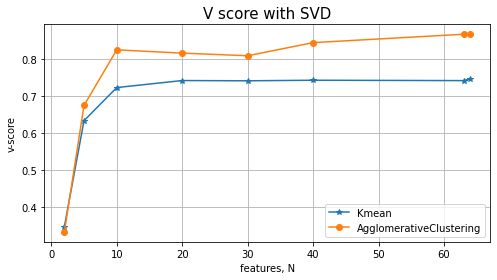

In [28]:
plt.subplots(1, 1, figsize=(8, 4))
xx = features_num
plt.plot(xx, vscore_kmean, "*-", label="Kmean")
plt.plot(xx, vscore_hierr, "o-", label="AgglomerativeClustering")
plt.legend()
plt.xlabel("features, N")
plt.ylabel("v-score")
plt.title("V score with SVD", fontsize=15)
plt.grid()

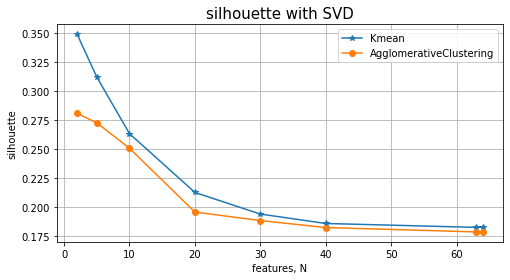

In [29]:
plt.subplots(1, 1, figsize=(8, 4))
xx = features_num
plt.plot(xx, siluet_kmean, "*-", label="Kmean")
plt.plot(xx, siluet_hierr, "o-", label="AgglomerativeClustering")
plt.legend()
plt.xlabel("features, N")
plt.ylabel("silhouette")
plt.title("silhouette with SVD", fontsize=15)
plt.grid()

#### `RESULTS`
    
    На графиках построены метрики v-score и silhouette при сингулярном разложениях матрицы датасета X, оставляющим 2, 5, 10, 20, 63 признаков. Метрики для исходного датасета нанесены при N=64.
    
    При изменении количества признаков метрики ведут себя по-разному. 
    V-score с ростом количества признаков увеличивается, после 10 выходит на плато.
    Silhouette наоборот, с ростом числа признаков падает. Но скорость падения замедляется в районе 20 признаков. 

****

Another popular dimensionality reduction approach that is useful for working with images is t-distributed stochastic neighbor embeddings, abbreviated `tSNE`. Unlike singular value decomposition, this it is non-linear transformation. It's main idea is to map points from a space of dimension `d` to another space of dimension 2 or 3 in such a way that the distances between points are mostly preserved. Mathematical details can be found, for example, [here](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

The implementation of `tSNE` in the `scikit-learn` library is the `TSNE` class in the `manifold` submodule.

**Note:** In recent years [UMAP](https://github.com/lmcinnes/umap) is often used istead of `tSNE`. It is a faster algorithm with similar properties. We don't ask you to use `UMAP` because it requires you to install another dependency, the `umap-learn` library. Those who wish can perform the following task using `UMAP`.

**(0.5 points)** Perform a tSNE-transform of the `X` matrix, leaving 2 features. Visualize the obtained data in the form of a scatter plot form: the first feature on the horizontal axis, and the second one the vertical axis. Color the points according to the digits they belong to.

- The `c` parameter in the plt.scatter function is responsible for the color of the points. Pass the true labels to it.

In [31]:
%%time
X_tsne = TSNE(n_components=2, learning_rate='auto',
            init='random').fit_transform(X)

CPU times: user 30.6 s, sys: 660 ms, total: 31.2 s
Wall time: 8.79 s


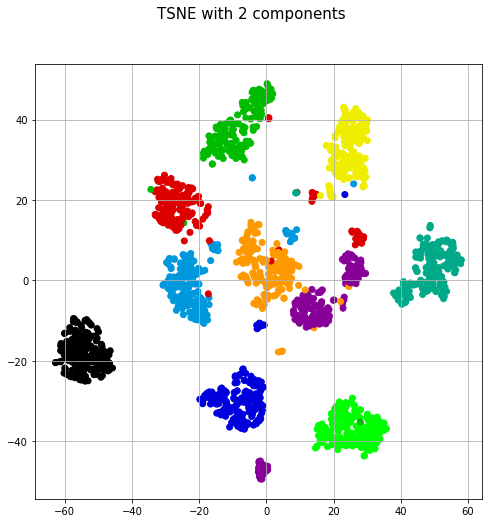

In [32]:
plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(X_tsne[:,0], X_tsne[:,1],
            c=plt.cm.nipy_spectral(y/10)
           )
plt.suptitle("TSNE with 2 components", fontsize=15)
plt.grid()

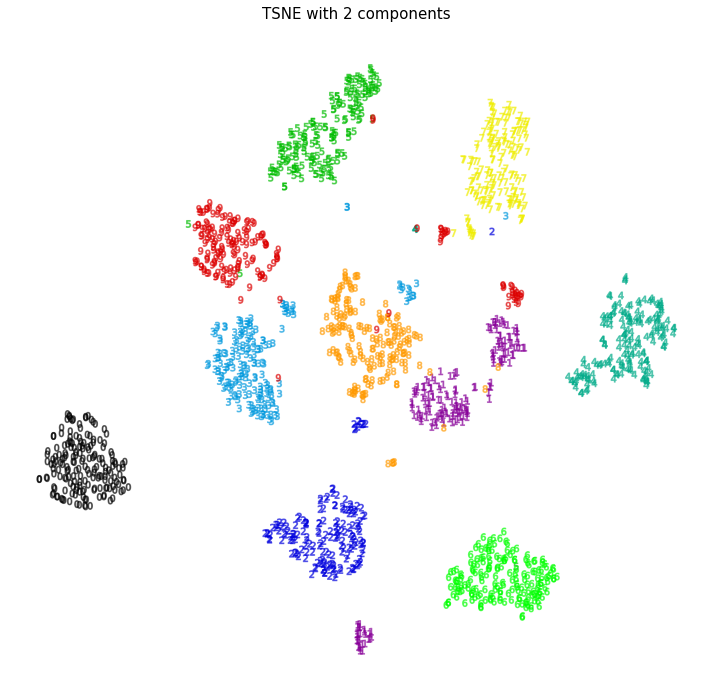

In [34]:
# ----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    for digit in np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.suptitle("TSNE with 2 components", fontsize=15)

    
plot_clustering(X_tsne, y)
plt.show()

**(0.5 points)** From the data transformed using the tSNE, perform hierarchical clustering and $K$-means clustering (take the number of clusters equal to 10). Calculate the silhouette and the $V$-score and compare them to corresponding values obtained from the original data.

In [35]:
## TSNE transformed data
# hierarchical
hierarchical = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
hierarchical_labels_tsne = hierarchical.labels_
vscore_hierr_tsne = v_measure_score(y, hierarchical_labels_tsne)
siluet_hierr_tsne = silhouette_score(X_tsne, hierarchical_labels_tsne, metric='euclidean')

# Kmeans
kmeans = KMeans(n_clusters=10, n_init=20).fit(X_tsne)
kmeans_labels_tsne = kmeans.predict(X_tsne)
vscore_kmean_tsne = v_measure_score(y, kmeans_labels_tsne)
siluet_kmean_tsne = silhouette_score(X_tsne, kmeans_labels_tsne, metric='euclidean')


print("Hierarchical clustering:")
print(f"TSNE vscore: {vscore_hierr_tsne}")
print(f"init vscore: {vscore_hierr_init}")
print(f"TSNE siluet: {siluet_hierr_tsne}")
print(f"init siluet: {siluet_hierr_init}")

print("\nKmeans clustering:")
print(f"TSNE vscore: {vscore_kmean_tsne}")
print(f"init vscore: {vscore_kmean_init}")
print(f"TSNE siluet: {siluet_kmean_tsne}")
print(f"init siluet: {siluet_kmean_init}")


Hierarchical clustering:
TSNE vscore: 0.9004259507936979
init vscore: 0.8681701126909083
TSNE siluet: 0.6274954676628113
init siluet: 0.17849659940596496

Kmeans clustering:
TSNE vscore: 0.9047962874037279
init vscore: 0.7474626236298446
TSNE siluet: 0.6312549710273743
init siluet: 0.18265554945950532


**(0.25 points)** Choose the best partition (in terms of silhouette or $V$-score) and visualize the centers of clusters with images. Did you managed to make each digit correspond to one center of the cluster?

Выберите лучший раздел (с точки зрения силуэта или 𝑉-оценки) и визуализируйте центры кластеров с изображениями. Удалось ли вам сделать так, чтобы каждая цифра соответствовала одному центру кластера?

In [36]:
%%time
features_num = [2, 4, 6, 7, 8, 10]
siluet_hierr, vscore_hierr = [], []
siluet_kmean, vscore_kmean = [], []
percents = []
for fnum in features_num:
    print(fnum)
    # TSNE transformation
    if fnum < 4:
        method = 'barnes_hut'
    else:
        method = 'exact'
    X_tsne = TSNE(n_components=fnum, learning_rate='auto', method=method,
            init='random').fit_transform(X)
    
    # hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
    hierarchical_labels = hierarchical.labels_
    vscore_hierr.append(v_measure_score(y, hierarchical_labels))
    siluet_hierr.append(silhouette_score(X_tsne, hierarchical_labels, metric='euclidean'))
    
    # Kmeans
    kmeans = KMeans(n_clusters=10, n_init=20).fit(X_tsne)
    kmeans_labels = kmeans.predict(X_tsne)
    vscore_kmean.append(v_measure_score(y, kmeans_labels))
    siluet_kmean.append(silhouette_score(X_tsne, kmeans_labels, metric='euclidean'))

2
4
6
7
8
10
CPU times: user 51min 29s, sys: 1min 22s, total: 52min 51s
Wall time: 33min 19s


In [37]:
## add initial data
features_num = list(features_num)
features_num.append(64)

# hierarchical
vscore_hierr.append(vscore_hierr_init) 
siluet_hierr.append(siluet_hierr_init) 

# Kmeans
vscore_kmean.append(vscore_kmean_init) 
siluet_kmean.append(siluet_kmean_init) 

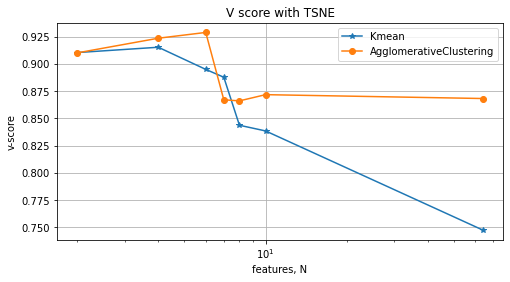

In [38]:
plt.subplots(1, 1, figsize=(8, 4))
xx = features_num
plt.plot(xx, vscore_kmean, "*-", label="Kmean")
plt.plot(xx, vscore_hierr, "o-", label="AgglomerativeClustering")
plt.legend()
plt.xlabel("features, N")
plt.ylabel("v-score")
plt.title("V score with TSNE")
plt.xscale('log')
plt.grid()

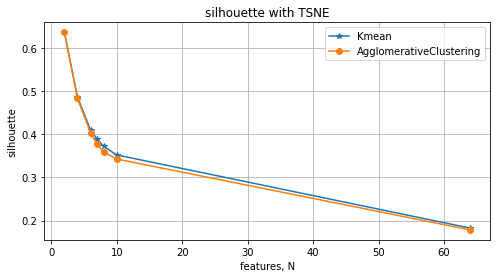

In [39]:
## plot siluette
plt.subplots(1, 1, figsize=(8, 4))
xx = features_num
plt.plot(xx, siluet_kmean, "*-", label="Kmean")
plt.plot(xx, siluet_hierr, "o-", label="AgglomerativeClustering")
plt.legend()
plt.xlabel("features, N")
plt.ylabel("silhouette")
plt.title("silhouette with TSNE")
plt.grid()

    Для построения модели оставим 6 признаков. 
    Параметр v-score для б'ольших значений ухудшается, а параметр силуэт имеет в этом месте перегиб, что означает, что добавление признаков добавляет меньше информации и качество кластеризации не сильно улучшается. 

In [40]:
%%time
X_tsne = TSNE(n_components=6, learning_rate='auto', method='exact',
            init='random').fit_transform(X)

# hierarchical
hierarchical = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
hierarchical_labels = hierarchical.labels_

# kmeans
kmeans = KMeans(n_clusters=10, n_init=20).fit(X_tsne)
kmeans_labels = kmeans.predict(X_tsne)

Text(0.5, 0.98, 'AgglomerativeClustering claster averages')

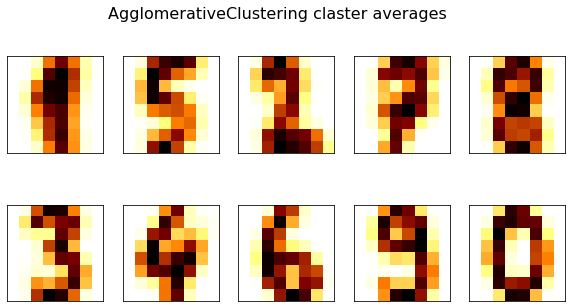

In [41]:
## calculate and plot averages of every claster 
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
i = 0
for ax, image, label in zip(axes.flatten(), X, y):
    image = np.mean(X[hierarchical.labels_== i], axis=0)
    ax.imshow(image.reshape((8, 8)), cmap= plt.cm.afmhot_r)
    ax.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                labelbottom=False, 
                right=False, left=False, labelleft=False)
    i += 1
fig.suptitle("AgglomerativeClustering claster averages", fontsize=16)

Text(0.5, 0.98, 'Kmeams cluster centers')

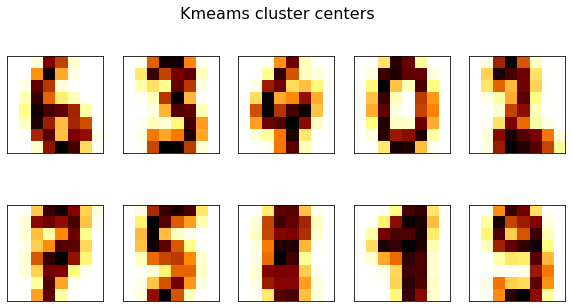

In [42]:
## averages of kmeans clusters
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
i = 0
for ax, image in zip(axes.flatten(), X):
    image = np.mean(X[kmeans.labels_== i], axis=0)
    ax.imshow(image.reshape((8, 8)), cmap= plt.cm.afmhot_r)
    ax.tick_params(axis='both', which='both', 
                    bottom=False, top=False, 
                    labelbottom=False, 
                    right=False, left=False, labelleft=False)
    i += 1
fig.suptitle("Kmeams cluster centers", fontsize=16)

    Нам удалось сделать так, чтобы каждая цифра соответствовала одному центру кластера!

## 4. Results and bonus part

Write in free form what conclusions you made after completing this assignment. Answer the following questions:

**(0.5 points)** Which algorithm gives more meaningful results - hierarchical clustering or $K$- means clustering. Does it depend on the algorithm settings or on the quality evaluation method?

Какой алгоритм дает более содержательные результаты — иерархическая кластеризация или $K$-means кластеризация. Это зависит от настроек алгоритма или от метода оценки качества?

    Метрика V-score у иерархической кластеризации обычно выше, он работает лучше, если судить по этому методу оценки качества.

**(0.5 points)** Imagine the situation where after hierarchical clustering, you need to cluster new data in the same way without retraining the model. Suggest a method how you will do it and how you will measure the quality of clustering of new data.

Представьте ситуацию, когда после иерархической кластеризации вам необходимо точно так же кластеризовать новые данные без переобучения модели. Предложите метод, как вы будете это делать и как вы будете измерять качество кластеризации новых данных.

    Как я понимаю, проблема в том, что у метода иерархической кластеризации нет метода predict() и мы не сможем применить уже полученную кластеризацию для кластеризации новых данных. Мы можем поступить следующим образом. 
    
    Примем кластеризованные данные за известные. Номера кластеров, полученные при иерархической кластеризации, будем рассмотривать как известные метки классов для каждого события из первоначального набора данных. Тогда для новых данным можно применить, например, метод Кnn ближайших соседей для отнесения новых событий к тому или иному кластеру, обучив его на ранее размеченных данных.
    Для измерения качества кластеризации новых данных применим метрику силуэт. Качество алгоритма Knn измерим отдельно.

**(0.5 points)** Does dimensionality reduction improve clustering results?

Улучшает ли уменьшение размерности результаты кластеризации?

    Уменьшение размерности конечной целью имеет получение более простой модели для более точного прогнозирования на небольших выборках.
    
    Уменьшение размерности с TSNE до 6 позволило нам добиться того, что каждая цифра соответствует одному кластеру.

**(0.5 points)** How to evaluate the quality of dimensional reduction? Suggest at least 2 options.

Как оценить качество размерной редукции? Предложите не менее 2-х вариантов.

    Оценку качества уменьшения размерности нужно проводить для каждого конкретного набора данных.
    
    Для метода главных компонент PCA можно оценить параметер количества процентной дисперсии, объясненной собственными векторами (PC). Она равна сумме собственных значений корреляционной матрицы используемой итоговой размерности. Если она близка к 100%, уменьшение размерности сохранило практически все разнообразие исходных данных.
    
    Если в анализе данных видно, что собственные значения не сильно отличаются, это означает, что признаки не очень сильно коррелированы. Если выбрать несколько собственных векторов с целью уменьшения размерности, то потеряется ценная информация, и мы не станем этого делать. С другой стороны, если первые несколько собственных значений велики по сравнению с остальными, то можно выполнить уменьшение размерности без потери ценной информации.
    
    Можно еще почитать тут https://stats.stackexchange.com/questions/162532/evaluate-output-of-different-dimensionality-reduction-methods
    
I had the same question recently and bump into the nice notebook here https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

In general, the idea is to run your dimensionality reductions, transform data and visualize to see if it is now possible to create clusters on it (like in your case). You can see than using for example PCA and its principal components how realistic is to use them to cluster the data. Here you are definitely limited by the amount of axes.

Alternatively, one can think about the reconstruction of the data (from Hands-on book from Géron)

X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
And calculate the mean squared distance between the original data and the reconstructed data. In this case the error shows not the best DR technique but what technique reduces dimensions more accurately and/or makes it possible to recover the original data set. It might be useful in some cases as well

**(Bonus 2 points)** Load the [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist) dataset. You can also do it with `scikit-learn` as explained [here](https://stackoverflow.com/a/60450028). Explore the data and try to cluster it using different approaches. Compare results of these approaches using the silhouette and the $V$-score.

Загрузите набор данных рукописных цифр MNIST. Вы также можете сделать это с помощью scikit-learn, как описано здесь. Изучите данные и попытайтесь сгруппировать их, используя разные подходы. Сравните результаты этих подходов, используя силуэт и 𝑉-оценку.